# **ZOMATO EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from palettable.cartocolors.qualitative import Prism_10
# sns.set()
# sns.set_palette(Prism_10.mpl_colors)
# sns.set_theme()
sns.set_palette(Prism_10.mpl_colors)

In [3]:
# impoting dataset
df = pd.read_csv('~/EDA/zomatodataset/zomato.csv', encoding = 'latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## **In EDA we perform these things first**
1. Check for missing values
2. Explore about numerical variables
3. Explore about categorical variables
4. Finding relationships between features

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

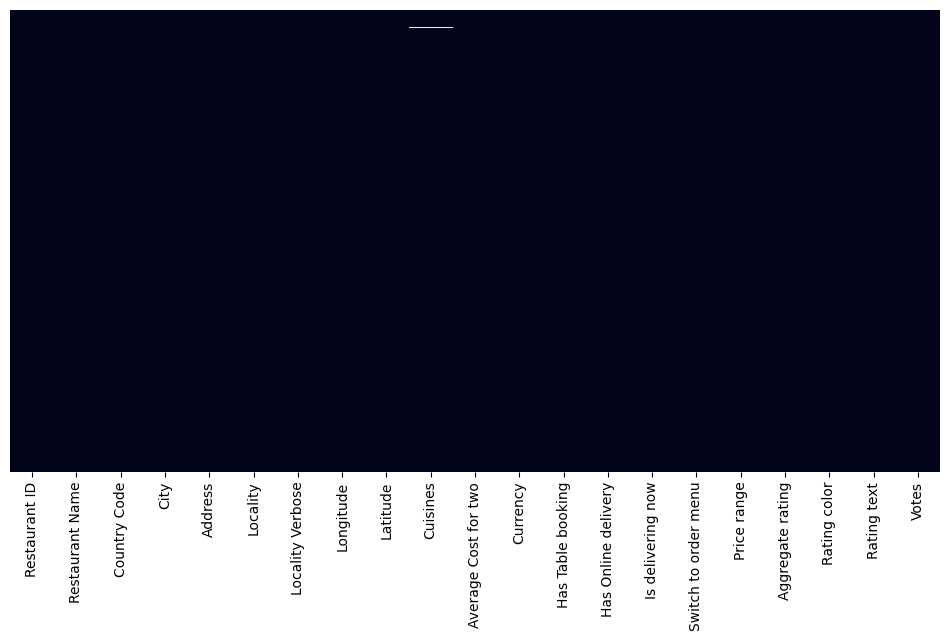

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
# sns.heatmap(df.isnull(), yticklabels = False, cmap = 'coolwarm', cbar = False)

In [8]:
df_country_code = pd.read_excel('~/EDA/zomatodataset/Country-Code.xlsx')    
df_country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


#### ***As we can see the country code column in Country-Code.xlsx is as same as in the zomato.csv***
#### ***and the country code is mapped to particular country in Country-Code.xlsx so we can combine these two datasets***

In [9]:
final_df = pd.merge(df_country_code, df, on = 'Country Code', how = 'right')
final_df.head(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Phillipines,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,Phillipines,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [10]:
final_df.columns.to_numpy()

array(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name',
       'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

#### ***The country column has been added in the final_df***

In [11]:
final_df.Country.value_counts()  #final_df['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

#### ***We can find out from this the majority market share of zomato is in India*** 

In [12]:
country_names = final_df.Country.value_counts().index.to_numpy()
country_values = final_df.Country.value_counts().to_numpy()
data = {'Countries' : country_names, 'Values' : country_values}
plot_df = pd.DataFrame(data)
plot_df

,Countries,Values
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,UAE,60
5,South Africa,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


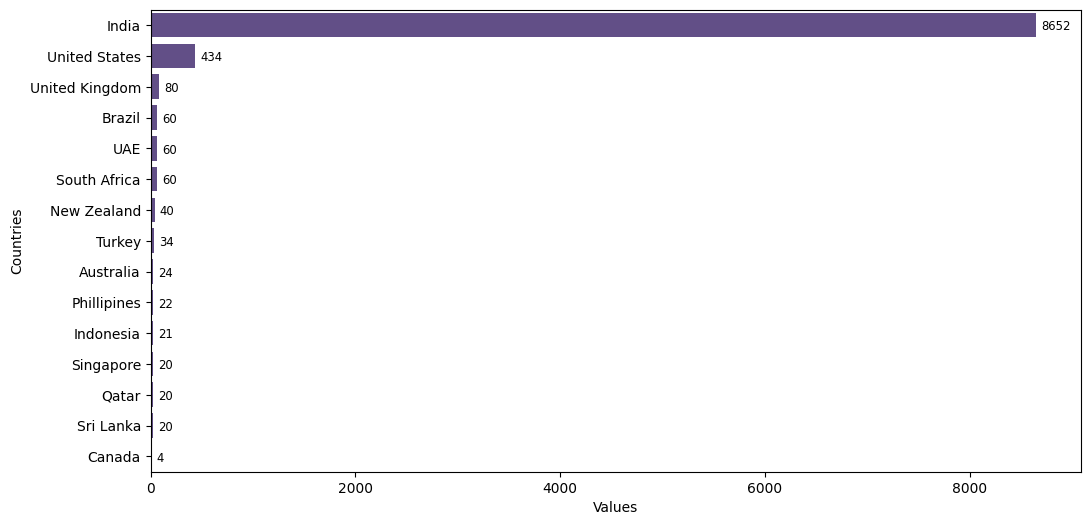

In [13]:
# with sns.axes_style('darkgrid'):  
ax = sns.barplot(plot_df, x = 'Values', y = 'Countries')
offset = 50
for index, value in enumerate(plot_df['Values']):
    ax.text(value + offset, index, str(value), color = 'black', va = "center_baseline", fontsize = 'small')

In [14]:
final_df.groupby(['Aggregate rating','Rating color','Votes',
                  'Has Online delivery']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Votes,Has Online delivery,Rating Count
0,0.0,White,0,No,1070
1,0.0,White,0,Yes,24
2,0.0,White,1,No,464
3,0.0,White,1,Yes,19
4,0.0,White,2,No,297
...,...,...,...,...,...
4404,4.9,Dark Green,2238,No,1
4405,4.9,Dark Green,2620,Yes,1
4406,4.9,Dark Green,3244,No,1
4407,4.9,Dark Green,5434,No,1


In [15]:
final_df[['Has Online delivery', 'Aggregate rating']].groupby(['Has Online delivery',
                                                               'Aggregate rating']).size().reset_index().rename(columns={0:'No. of Hotels'})

,Has Online delivery,Aggregate rating,No. of Hotels
0,No,0.0,2052
1,No,1.9,1
2,No,2.0,2
3,No,2.1,4
4,No,2.2,7
...,...,...,...
60,Yes,4.5,16
61,Yes,4.6,11
62,Yes,4.7,7
63,Yes,4.8,1


In [16]:
ratings = final_df[['Aggregate rating','Rating color',
          'Rating text']].groupby(['Aggregate rating','Rating color',
                                   'Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


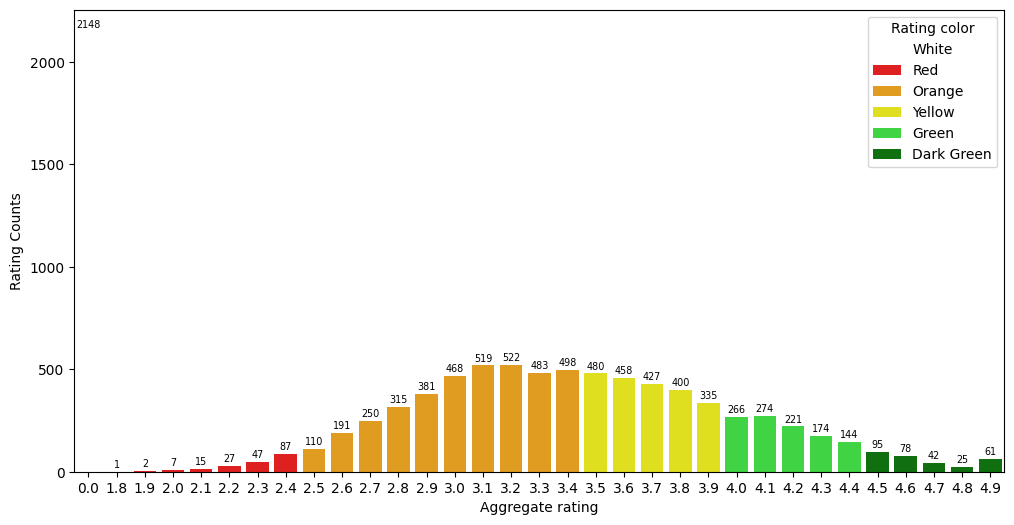

In [17]:
# with sns.axes_style('darkgrid'):
bp = sns.barplot(data=ratings, x='Aggregate rating', y='Rating Counts', hue='Rating color', palette=['white','red','orange',
                                                                                                'yellow','#28eb2b','green'])
offset = 20
for index, value in enumerate(ratings['Rating Counts']):
    bp.text(index, value+offset, str(value), color = 'black', ha = 'center', fontsize = 'x-small')
plt.savefig('barplot.png')

### Observation
  1. Number of people who did not rate is very high
  2. Maximum number of rating is between 2.5 to 3.4

In [18]:
final_df[final_df['Aggregate rating'] == 0.0].groupby('Country').size().reset_index().rename(columns={0:'No. of Hotels'})

,Country,No. of Hotels
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [19]:
final_df[['Currency','Country']].groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [20]:
# final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()
final_df[final_df['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index().rename(columns={0:'No. of hotels having online delivery'})

,Country,No. of hotels having online delivery
0,India,2423
1,UAE,28


Observation:
  1. India and UAE are the only two countries where online delivery is available

([<matplotlib.patches.Wedge at 0x7f1e24cf30e0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0652024126252511, -1.1481500970639016, 'Gurgaon'),
  Text(0.9428248514761759, -0.7095641616083264, 'Noida'),
  Text(1.201444026004578, -0.14363931348315145, 'Faridabad'),
  Text(1.2499389545518316, -0.012353537706852186, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.9%'),
  Text(0.0368535375707941, -0.6489544026882921, '14.1%'),
  Text(0.5433227957659318, -0.40890138126581516, '13.6%'),
  Text(0.7049795524489673, -0.08428422526697316, '3.2%'),
  Text(0.7499633727310989, -0.007412122624111311, '0.3%')])

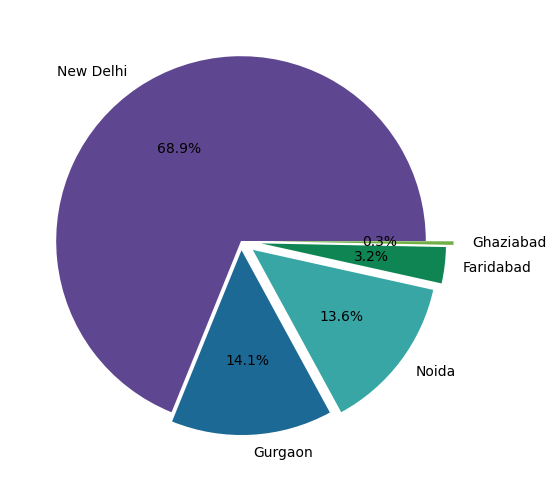

In [21]:
city_values = final_df.City.value_counts().to_numpy()
city_names = final_df.City.value_counts().index.to_numpy()
plt.pie(city_values[:5], labels = city_names[:5],
        explode = [0,0.05,0.08,0.11,0.15], autopct = '%1.1f%%')

In [22]:
final_df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [23]:
final_df[final_df['Aggregate rating'] == 4.9].groupby(['Aggregate rating','Cuisines']).size().reset_index()

,Aggregate rating,Cuisines,0
0,4.9,"American, BBQ, Sandwich",1
1,4.9,"American, Burger, Grill",1
2,4.9,"American, Caribbean, Seafood",1
3,4.9,"American, Coffee and Tea",1
4,4.9,"American, Sandwich, Tea",1
5,4.9,Asian,1
6,4.9,"BBQ, Breakfast, Southern",1
7,4.9,"Bakery, Desserts",1
8,4.9,Bar Food,1
9,4.9,"Brazilian, Bar Food",2


In [ ]:
topCuisines = final_df['Cuisines'].value_counts()
topCuisines_values = final_df['Cuisines'].value_counts().to_numpy()
topCusines_names = final_df['Cuisines'].value_counts().index
plt.pie(topCuisines_values[:10], labels = topCusines_names[:10], autopct = '%1.1f%%')

In [ ]:
final_df['New Cuisines'] = final_df['Cuisines'].str.split(',')
new_df = final_df.explode('New Cuisines')
new1_df = pd.DataFrame(new_df.groupby('New Cuisines').size().reset_index(name='Count'))
new1_df.sort_values(by='Count', ascending=False, inplace=True)
new1_df.reset_index(drop=index).reset_index()

In [ ]:
final_df[['Cuisines']].value_counts().reset_index()

In [ ]:
final_df.groupby(['Country'])['Currency'].apply(lambda x: ','.join(x.unique())).reset_index()

In [ ]:
temp_df = final_df[final_df['Country'] == 'Australia']

In [ ]:
temp_df['Aggregate rating']

In [ ]:
final_df['Cuisines'].apply(lambda x: ','.join(x.unique()))
final_df[final_df['Aggregate rating'] == 4.9].groupby(['Cuisines'])['Cusines'].size().reset_index()

In [ ]:
final_df.Currency.unique()
final_df.groupby('Country').Currency.unique()

In [ ]:
final_df['Cuisines'].str.split(',').explode().value_counts()

In [ ]:
# Findinf top 10 Cuisines 
topCuisines_values = final_df['Cuisines'].str.split(',').explode().value_counts().to_numpy()[:10]
topCuisines_names = final_df['Cuisines'].str.split(',').explode().value_counts().index[:10]
plt.pie(topCuisines_values, labels = topCuisines_names, autopct = '%1.1f%%')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'unique_cuisines': final_df['Cuisines'].unique()})

In [ ]:
temp_df

In [24]:
final_df['New Cuisines'] = final_df['Cuisines'].str.split(',')

In [42]:
final_df['Cuisines'].str.split(',')

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9551, dtype: object